# Question one （用python）实现线性回归算法

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

In [2]:
# （1）导入数据集（Olympics）
data = pd.read_csv('Olympics_data.csv')
x = data['year'].values
y = data['time'].values

In [3]:
# （2）利用公式 (1) 和 (2) 求出直线方程
# 公式一
# 计算x,y均值
x_mean = np.mean(x)
y_mean = np.mean(y)
# 计算w1
# 分子为(x-xmean)和(y-ymean)之和
# 分母为(x-xmean)的平方和
w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
# 计算w0
w0 = y_mean - w1 * x_mean

print(f"w1: {w1}, w0: {w0}")

# 公式二
# 构建矩阵X，其中第一列全是1，第二列是x
# 矩阵 ( X ) 的第一列是全1，代表截距项；第二列是 ( x ) 的值。这样构建的设计矩阵 ( X ) 可以用于正规方程法求解线性回归的参数 ( W )
X = np.vstack([np.ones(len(x)), x]).T
# 公式 W = (X^T * X)^(-1) * X^T * y
W = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"W: {W}")

w1: -0.01298299933615468, w0: 35.73069662268692
W: [ 3.57306966e+01 -1.29829993e-02]


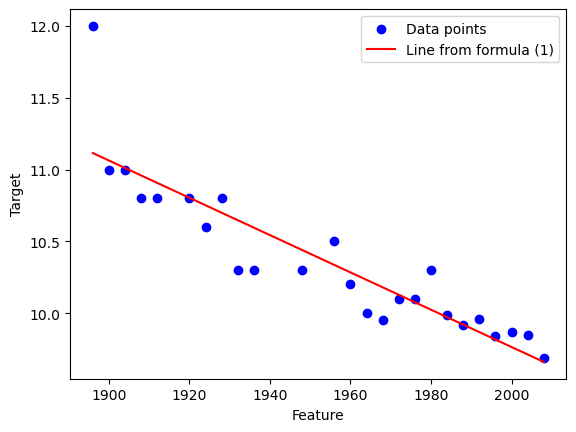

In [4]:
# 画出原始数据点云
plt.scatter(x, y, color='blue', label='Data points')

# 画出直线
y_pred1 = w1 * x + w0
plt.plot(x, y_pred1, color='red', label='Line from formula (1)')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

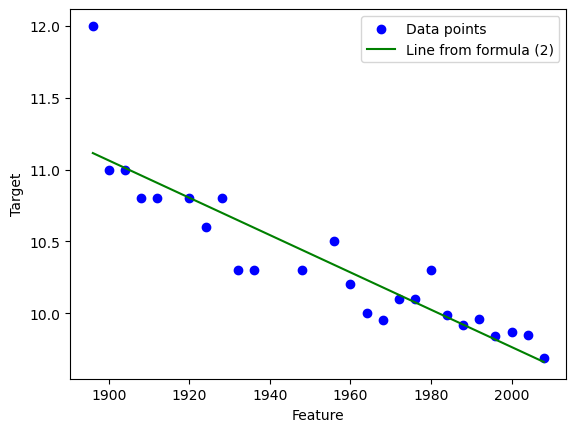

In [5]:
# 画出原始数据点云
plt.scatter(x, y, color='blue', label='Data points')

# 画出直线
y_pred2 = X @ W
plt.plot(x, y_pred2, color='green', label='Line from formula (2)')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# 评价优劣

In [6]:
# 示例数据
x = np.random.rand(100000000)  # 增加数据量
y = 2 * x + 1 + np.random.normal(0, 0.1, 100000000)

# 计算x, y均值
x_mean = np.mean(x)
y_mean = np.mean(y)

# 计算公式 (1) 的运行时间和内存使用
def formula_one(x, y, x_mean, y_mean):
    start_time = time.perf_counter()
    w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    w0 = y_mean - w1 * x_mean
    time_formula1 = (time.perf_counter() - start_time) * 1e6  # 转换为微秒
    return w1, w0, time_formula1

# 计算公式 (2) 的运行时间和内存使用
def formula_two(x, y):
    X = np.vstack([np.ones(len(x)), x]).T
    start_time = time.perf_counter()
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    time_formula2 = (time.perf_counter() - start_time) * 1e6  # 转换为微秒
    return W, time_formula2

# 测量公式 (1) 的内存使用
mem_usage_one = memory_usage((formula_one, (x, y, x_mean, y_mean)), interval=0.0001)
w1, w0, time_formula1 = formula_one(x, y, x_mean, y_mean)

# 测量公式 (2) 的内存使用
mem_usage_two = memory_usage((formula_two, (x, y)), interval=0.0001)
W, time_formula2 = formula_two(x, y)

# 计算均方误差（MSE）
y_pred1 = w1 * x + w0
mse_formula1 = np.mean((y - y_pred1)**2)

# 确保y_pred2的形状与y匹配
X = np.vstack([np.ones(len(x)), x]).T
y_pred2 = X @ W
mse_formula2 = np.mean((y - y_pred2)**2)

# 输出结果
print(f"公式 (1) - 时间: {time_formula1:.5f} 微秒, 内存使用: {max(mem_usage_one) - min(mem_usage_one):.2f} MiB, MSE: {mse_formula1:.4f}")
print(f"公式 (2) - 时间: {time_formula2:.5f} 微秒, 内存使用: {max(mem_usage_two) - min(mem_usage_two):.2f} MiB, MSE: {mse_formula2:.4f}")

公式 (1) - 时间: 1499531.30000 微秒, 内存使用: 2288.90 MiB, MSE: 0.0100
公式 (2) - 时间: 780170.50000 微秒, 内存使用: 3051.83 MiB, MSE: 0.0100


# Question two 用 LogisticRegression 模型做二分类任务

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# （1）导入数据集并划分训练集/测试集（乳腺癌数据集，sklearn库自带）
breast_cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=42)

In [ ]:
# （2）构建对数几率回归模型（调库）
model = LogisticRegression(max_iter=10000) # max_iter最大迭代次数。在最大迭代次数之前若收敛，那就直接停。
model.fit(X_train, y_train)

In [ ]:
# （3）计算评估指标：AUC（调库）
y_pred_prob = model.predict_proba(X_test)[:, 1] # 提取每一行的第二个值，即样本属于类别 1 的概率
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")

In [ ]:
# （4）可视化（ROC曲线，参考Experimental_Results中的ROC）
# ROC 曲线计算
fpr, tpr, _ = roc_curve(y_test, y_pred_prob) # roc_curve 函数返回三个值：fpr（假阳性率）、tpr（真阳性率）和 thresholds（阈值）

# 画出ROC曲线
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 二分类：AUC

### Question 4 在二分类和多分类任务中手动计算评估指标（选做）

In [ ]:
# 计算真正例率和假正例率
def roc_curve_manual(y_true, y_scores):
    # 将预测的分数进行排序，作为阈值使用
    thresholds = np.sort(y_scores)
    
    tpr = []
    fpr = []
    
    # 遍历每一个阈值
    for thresh in thresholds:
        # 计算在当前阈值下的真阳性数
        tp = np.sum((y_scores >= thresh) & (y_true == 1))
        # 计算在当前阈值下的假阳性数
        fp = np.sum((y_scores >= thresh) & (y_true == 0))
        # 计算在当前阈值下的假阴性数
        fn = np.sum((y_scores < thresh) & (y_true == 1))
        # 计算在当前阈值下的真阴性数
        tn = np.sum((y_scores < thresh) & (y_true == 0))
        # 计算真阳性率 TPR = TP / (TP + FN)
        tpr.append(tp / (tp + fn))
        # 计算假阳性率 FPR = FP / (FP + TN)
        fpr.append(fp / (fp + tn))
    return np.array(fpr), np.array(tpr)

In [ ]:
# 计算 AUC
def auc_manual(fpr, tpr):
    # trapz 函数使用梯形法则（trapezoidal rule）来近似积分，即计算曲线下的面积。
    return np.trapz(tpr, fpr) 

In [ ]:
fpr, tpr = roc_curve_manual(y_test, y_pred_prob)
auc = auc_manual(fpr, tpr)
print(f"Manual AUC: {auc}")

# Question 3 用 LogisticRegression 模型做多分类任务

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# （1）导入数据集并划分训练集/测试集（鸢尾花数据集，sklearn库自带）
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

In [ ]:
# （2）构建对数几率回归模型（调库）
# 一对多，为每个类别训练一个分类器，总共序列n_class个分类器
model = LogisticRegression(max_iter=10000, multi_class='ovr') # ove one vs rest 一对多的缩写。用于处理多分类问题。
model.fit(X_train, y_train)

In [ ]:
# （3）计算评估指标：accuracy, precision, recall, F1-score（调库）
# 预测
y_pred = model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

In [ ]:
# （4）可视化（决策边界，参考Experimental_Results中的LogisticRegression）

# 仅两个特征可视化
# 分别提取训练集和测试集的前两个特征
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# 重新训练模型
model.fit(X_train_2d, y_train)

# 画出决策边界
# 确定绘图范围，xmin和xmax是第一个特征的最小值和最大值
# y_min 和 y_max 是第二个特征的最小值和最大值
# 减1和加1是为了在图中留出一些边距
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

# 创建一个网格，xx 和 yy 是网格的坐标矩阵，步长为0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# np.c_[xx.ravel(), yy.ravel()] 将网格点组合成一个二维数组
# model.predict 对每个点进行预测。Z 是预测结果
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# 将预测结果重新调整为网格的形状
Z = Z.reshape(xx.shape)

# plt.contourf 函数，该函数需要输入与网格形状相同的预测结果，以便正确绘制决策边界。
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k',  marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

## 多分类：accuracy, precision, recall, F1-score

### Question 4 在二分类和多分类任务中手动计算评估指标（选做）

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# 将标签二值化
# 在多分类问题中，每个标签可以独立地为正类或负类。因此，这需要将每个标签单独处理为二分类问题
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

In [ ]:
# 计算 accuracy
accuracy = np.mean(y_test == y_pred)
print(f"Manual Accuracy: {accuracy}")

In [ ]:
# 计算 precision, recall, F1-score
def precision_recall_f1_manual(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    # 遍历每个标签.每列代表一个标签
    for i in range(y_true.shape[1]):
        # 真阳性
        tp = np.sum((y_pred[:, i] == 1) & (y_true[:, i] == 1))
        # 假阳性
        fp = np.sum((y_pred[:, i] == 1) & (y_true[:, i] == 0))
        # 假阴性
        fn = np.sum((y_pred[:, i] == 0) & (y_true[:, i] == 1))
        # 准确率
        precision.append(tp / (tp + fp) if tp + fp > 0 else 0)
        # 召回率
        recall.append(tp / (tp + fn) if tp + fn > 0 else 0)
        # f1
        f1.append(2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1]) if precision[-1] + recall[-1] > 0 else 0)
    return np.mean(precision), np.mean(recall), np.mean(f1)

In [ ]:
precision, recall, f1 = precision_recall_f1_manual(y_test_bin, y_pred_bin)
print(f"Manual Precision: {precision}")
print(f"Manual Recall: {recall}")
print(f"Manual F1-score: {f1}")